In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Employee.csv")

In [3]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [4]:
data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
data.shape

(148, 6)

In [8]:
data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [9]:
# Data Cleaning: Fill missing values with mean and mode
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Salary"].fillna(data["Salary"].mean(), inplace=True)
data["Place"].fillna(data["Place"].mode().iloc[0], inplace=True)

In [10]:
data.isnull().sum()

Company    8
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [11]:
# Data Analysis
filtered_data = data[(data["Age"] > 40) & (data["Salary"] < 5000)]
print(filtered_data)

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


In [12]:
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.000000,Calcutta,India,1
144,Infosys,22.0,8787.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


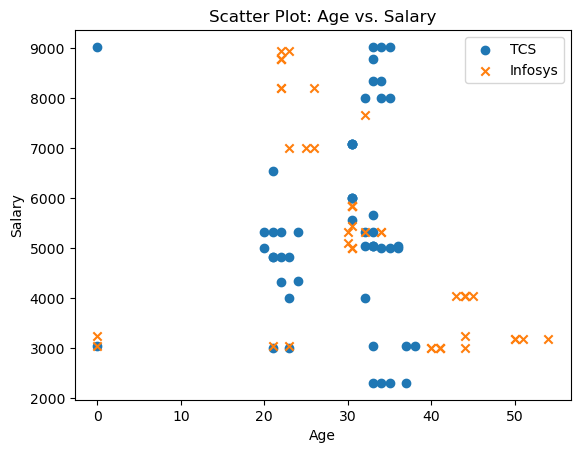

In [13]:
# Scatter plot
plt.scatter(data[data['Company'] == 'TCS']['Age'], data[data['Company'] == 'TCS']['Salary'], label='TCS', marker='o')
plt.scatter(data[data['Company'] == 'Infosys']['Age'], data[data['Company'] == 'Infosys']['Salary'], label='Infosys', marker='x')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Scatter Plot: Age vs. Salary')
plt.legend()
plt.show()

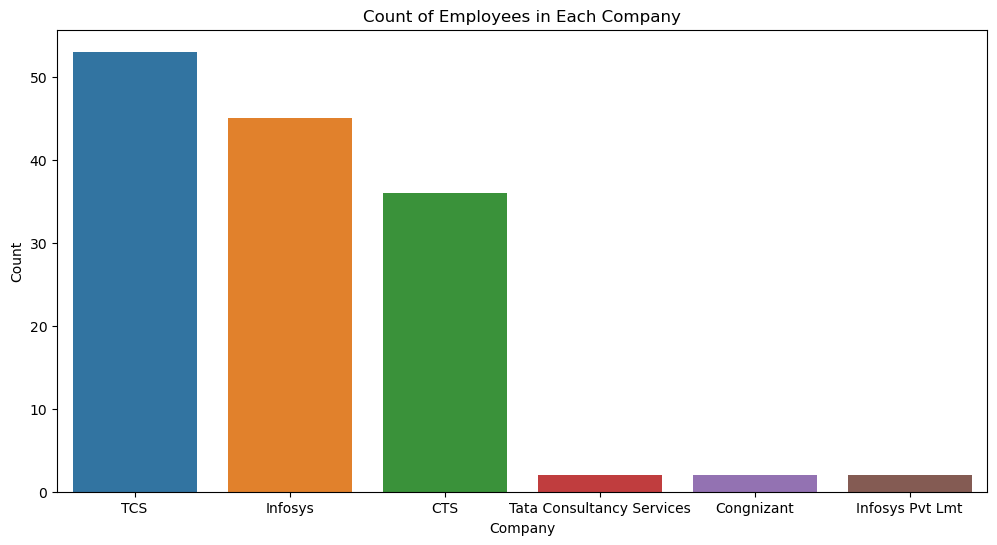

In [21]:
# Bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Company', data=data)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Count of Employees in Each Company')
plt.show()

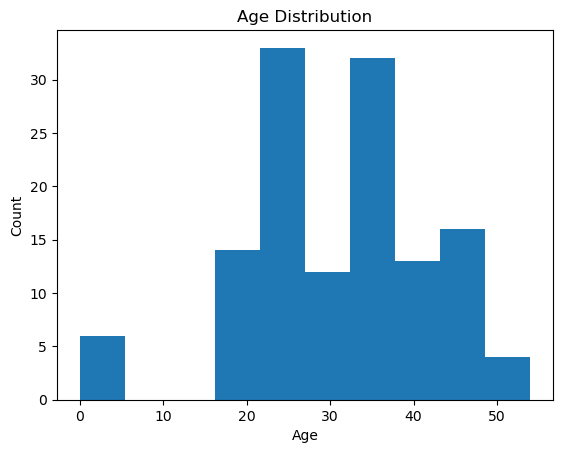

In [22]:
# Histogram
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


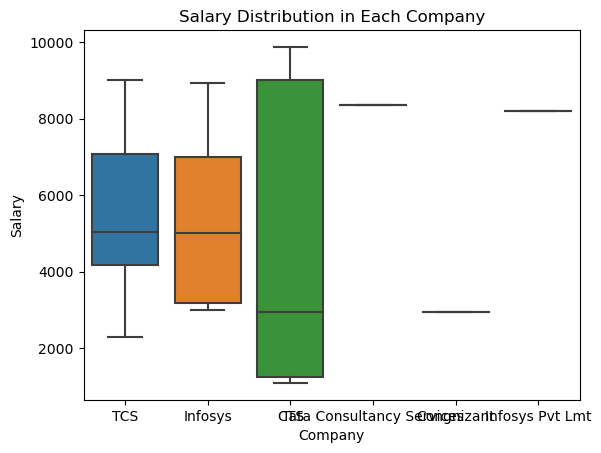

In [23]:
# Box plot
sns.boxplot(x='Company', y='Salary', data=data)
plt.xlabel('Company')
plt.ylabel('Salary')
plt.title('Salary Distribution in Each Company')
plt.show()

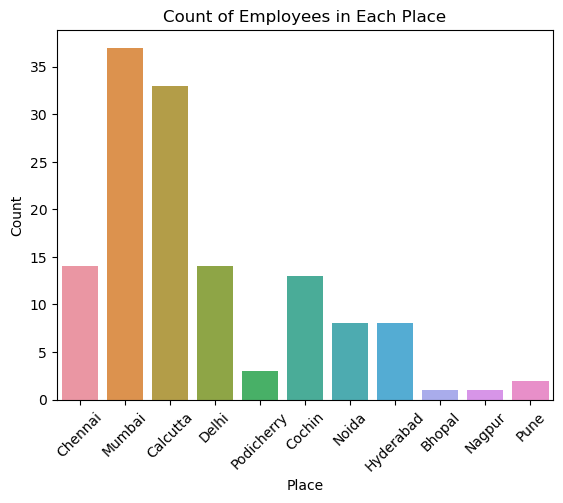

In [24]:
# Bar plot for place count
sns.countplot(x='Place', data=data)
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Count of Employees in Each Place')
plt.xticks(rotation=45)
plt.show()

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

In [26]:
# Data Encoding: One-Hot Encoding for categorical variables
cat_columns = ['Company', 'Place', 'Country']  # Columns to be one-hot encoded
data_encoded = pd.get_dummies(data, columns=cat_columns, drop_first=True)

In [27]:
# Label Encoding for binary variable 'Gender'
label_encoder = LabelEncoder()
data_encoded['Gender'] = label_encoder.fit_transform(data_encoded['Gender'])

In [28]:
# Feature Scaling: StandardScaler and MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Scaling 'Age' and 'Salary' using StandardScaler
data_encoded[['Age', 'Salary']] = scaler_standard.fit_transform(data_encoded[['Age', 'Salary']])


In [30]:
print(data_encoded)

          Age    Salary  Gender  Company_Congnizant  Company_Infosys  \
0   -0.948501       NaN       0                   0                0   
1   -0.043841       NaN       0                   0                1   
2    0.408489 -1.175200       0                   0                0   
3    0.860819 -0.902122       0                   0                1   
4   -0.677103 -0.512010       0                   0                0   
..        ...       ...     ...                 ...              ...   
143  0.227557  1.447914       1                   0                0   
144 -0.767569  1.355457       1                   0                1   
145  1.222683 -0.498746       1                   0                1   
146  0.227557 -0.108634       1                   0                0   
147 -0.767569  1.127242       0                   0                1   

     Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                          0            1              

In [31]:
data_encoded.head()

,Age,Salary,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,-0.948501,NaN,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,-0.043841,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.408489,-1.175200,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.860819,-0.902122,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.677103,-0.512010,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [33]:
# Data Cleaning: Fill missing values with mean and mode
data_encoded["Age"].fillna(data_encoded["Age"].mean(), inplace=True)

In [34]:
data_encoded.head()

,Age,Salary,Gender,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,-0.948501,-2.686023e-17,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,-0.043841,-2.686023e-17,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.408489,-1.175200e+00,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.860819,-9.021217e-01,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.677103,-5.120096e-01,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
